In [1]:

import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')


#testing out git version control

[nltk_data] Downloading package punkt to /Users/mary/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/mary/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/mary/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /Users/mary/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
import pandas as pd
import numpy as np
import nltk
from matplotlib import pyplot as plt
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer 
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_recall_curve,f1_score,auc
from sklearn.metrics import confusion_matrix, classification_report

In [3]:

# Set seed for reproduceable results
np.random.seed(500)
# Read in to Pandas DataFrame and drop the first row(which contained column names as I have assigned new names)
reviews = pd.read_csv(r"rt_reviews.csv", names = ['target', 'review'], encoding = 'latin-1')
reviews = reviews.iloc[1:]

/Users/mary/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
# Standardize target data types to numeric
for i in range(reviews.shape[0]):
    if(reviews['target'].values[i] == '0'):
        reviews['target'].values[i] = 0
    elif(reviews['target'].values[i] == '1'):
        reviews['target'].values[i] = 1
for i in range(reviews.shape[0]):
    if(isinstance(reviews['target'].values[i],str)):
        print("Caught: ",reviews['target'].values[i])
    if(reviews['target'].values[i] != 0 and reviews['target'].values[i] != 1):
        print("Error")

In [5]:
# Choose number of samples to use
reviews = reviews.iloc[:1000] #removed two zeros

In [6]:
# Remove and row where either datafield is blank, no rows contained blank data so the shape remains 480000,2 
reviews.dropna(inplace = True)
reviews.shape

(1000, 2)

In [7]:
# Convert all text to lowercase
reviews['review'] = [entry.lower() for entry in reviews['review']]

In [8]:
# Tokenize each review: this process converts each review into a set of words. 
reviews['review'] = [word_tokenize(entry) for entry in reviews['review']]

In [9]:
################# Lemmatizing ##############

# Creating tags so that lemmatizer can understand verbs from nouns from adjectives 
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

for index,entry in enumerate(reviews['review']):
    index = index+1 # Index seems to off by one, this fixes it
    # Words that follow the rules will end up in this list
    Final_words = []
    
    word_Lemmatized = WordNetLemmatizer()
    
    for word, tag in pos_tag(entry):
        if word not in stopwords.words('english') and word.isalpha() and wordnet.synsets(word):
            word_Final = word_Lemmatized.lemmatize(word, tag_map[tag[0]])
            Final_words.append(word_Final)
        reviews.loc[index, 'lemmatized_words'] = str(Final_words)

In [10]:
################ Unaltered Words ############

for index, entry in enumerate(reviews['review']):
    index = index + 1
    Final_words = []
        
    for word, tag in pos_tag(entry):
        if word not in stopwords.words('english') and word.isalpha() and wordnet.synsets(word):
            word_Final = word  #This is where a stemmer would go
            Final_words.append(word_Final)
        reviews.loc[index, 'unaltered_words'] = str(Final_words)        

In [11]:
############### Stemming Words ###############

for index, entry in enumerate(reviews['review']):
    index = index + 1
    Final_words = []
        
    word_Stemmer = PorterStemmer()
        
    for word, tag in pos_tag(entry):
        if word not in stopwords.words('english') and word.isalpha() and wordnet.synsets(word):
            word_Final = word_Stemmer.stem(word)  #This is where a stemmer would go
            Final_words.append(word_Final)
        reviews.loc[index, 'stemmed_words'] = str(Final_words)        

In [12]:
reviews

,target,review,lemmatized_words,unaltered_words,stemmed_words
1,1,"[manakamana, does, n't, answer, any, questions...","['answer', 'question', 'yet', 'make', 'point',...","['answer', 'questions', 'yet', 'makes', 'point...","['answer', 'question', 'yet', 'make', 'point',..."
2,1,"[wilfully, offensive, and, powered, by, a, che...","['wilfully', 'offensive', 'power', 'machismo',...","['wilfully', 'offensive', 'powered', 'machismo...","['wil', 'offens', 'power', 'machismo', 'good',..."
3,0,"[it, would, be, difficult, to, imagine, materi...","['difficult', 'imagine', 'material', 'wrong', ...","['difficult', 'imagine', 'material', 'wrong', ...","['difficult', 'imagin', 'materi', 'wrong', 'sp..."
4,0,"[despite, the, gusto, its, star, brings, to, t...","['despite', 'gusto', 'star', 'brings', 'role',...","['despite', 'gusto', 'star', 'brings', 'role',...","['despit', 'gusto', 'star', 'bring', 'role', '..."
5,0,"[if, there, was, a, good, idea, at, the, core,...","['good', 'idea', 'core', 'film', 'bury', 'unsi...","['good', 'idea', 'core', 'film', 'buried', 'un...","['good', 'idea', 'core', 'film', 'buri', 'unsi..."
...,...,...,...,...,...
996,1,"[[, writer-director, azazel, jacobs, ], clearl...","['jacob', 'clearly', 'eye', 'ear', 'confused',...","['jacobs', 'clearly', 'eye', 'ear', 'confused'...","['jacob', 'clearli', 'eye', 'ear', 'confus', '..."
997,0,"[a, disastrous, father-son, endeavor, about, a...","['disastrous', 'endeavor', 'calamitous', 'expe...","['disastrous', 'endeavor', 'calamitous', 'expe...","['disastr', 'endeavor', 'calamit', 'expedit', ..."
998,1,"[inspiring, docu, advocates, for, legislation,...","['inspire', 'advocate', 'legislation', 'help',...","['inspiring', 'advocates', 'legislation', 'hel...","['inspir', 'advoc', 'legisl', 'help', 'famili']"
999,0,"[um, dos, tipos, de, besteira, mais, irritante...","['do', 'de', 'de', 'para']","['dos', 'de', 'de', 'para']","['do', 'de', 'de', 'para']"


In [13]:
# Create Train and Test splits 
test_s = .15
train_x, test_x, train_y, test_y = model_selection.train_test_split(reviews['unaltered_words'], 
                                                                    reviews['target'], test_size=test_s)

In [14]:
print("\ntrain_x Shape: ", train_x.shape)
print("\ntrain_y Shape: ", train_y.shape)
print("\ntest_x Shape: ", test_x.shape)
print("\ntest_y Shape: ", test_y.shape)


train_x Shape:  (850,)

train_y Shape:  (850,)

test_x Shape:  (150,)

test_y Shape:  (150,)


In [15]:
# Encode target data
Encoder = LabelEncoder()
train_y = Encoder.fit_transform(train_y)
test_y = Encoder.fit_transform(test_y)

In [16]:
max_f = 100000
Tfidf_vect = TfidfVectorizer(max_features=max_f)
Tfidf_vect.fit(reviews['unaltered_words'])
train_x_Tfidf = Tfidf_vect.transform(train_x)
test_x_Tfidf = Tfidf_vect.transform(test_x)
#print(Tfidf_vect.vocabulary_)
len(Tfidf_vect.vocabulary_)

4601

In [17]:
# Python dictionary of various test results: 

# These test results use a data set that contains no english words, is lemmatized

zach_test_results = {
    # Max features percentages are out of 36131(which is max features when
    # full 480000 sampels and non english words removed, .15 test size)
    
    # 9033 features 
    "max-features_.25" : {"accuracy" : 0.7748 , "f1-avg" : 0.775 },
    
    # 18066
    "max-features_.50" : {"accuracy" : 0.7810 , "f1-avg" : 0.78 },
    
    # 27120
    "max-features_.75" : {"accuracy" : 0.7841 , "f1-avg" : 0.78 },
    
    #30711
    "max-features_.85" : {"accuracy" : 0.7845, "f1-avg" : 0.785 },
    
    # 34324
    "max-features_.95" : {"accuracy" : 0.7845, "f1-avg" : 0.785},
    
    # 36131
    "max-features_1.00" : {"accuracy" : 0.7845, "f1-avg" : 0.785},
    
    
    # Removing words with low information 
    
    # results in only 6027 features meaning the majority are below 100 df
    "min_df_100" : {"accuracy" : 0.7673 , "f1-avg": 0.77 },
    
    # results in 9060 feautures
    "min_df_50" : {"accuracy" : 0.7748 , "f1-avg": 0.775 },
    
    # results in 18458 features
    "min_df_10" : {"accuracy" : 0.7811 , "f1-avg": 0.78},
    
    # results in 23402 features
    "min_df_5" : {"accuracy" : 0.7833, "f1-avg": 0.78 },
    
    #results in 36131 features
    "min_df_1" : {"accuracy" : 0.7845, "f1-avg": 0.785 },
    
    #results in 36131 features
    "min_df_0" : {"accuracy" : 0.7845, "f1-avg": 0.785}, 
    
    # when non english features taken out only 36131 features
    # when non english words not taken out 69635
    "max-samples-norestriction-wo-nonenglish-test.15": {"accuracy" : 0.7845, "f1-avg" : 0.785},
    "max-samples-norestriction-w-nonenglish-test.15": {"accuracy" : 0.79275, "f1-avg" : 0.79},
    
    # trained with 480K samples and titles removed
    #36131 features
    "lemma" : {"accuracy" : .7833 , 'f1-avg' : .78},
    #24835 features 
    "stem" : {"accuracy" : .7792 , 'f1-avg' : .78},
    #47506 features 
    "unaltered" : {"accuracy" : .7945, 'f1-avg' : .795}, 
    
    # trained with 10K samples and titles removed
    #12775 features
    "lemma" : {"accuracy" : .708 , 'f1-avg' : .705},
    #10402 features 
    "stem" : {"accuracy" : .7153 , 'f1-avg' : .715},
    #15973 f 
    "unaltered" : {"accuracy" : .7093, 'f1-avg' : .71}, 
    
     # trained with 100K samples and titles removed
    #26600 features
    "lemma" : {"accuracy" : .77507 , 'f1-avg' : .775},
    #19459 features 
    "stem" : {"accuracy" : .762 , 'f1-avg' : .76},
    #34772 f 
    "unaltered" : {"accuracy" : .7752, 'f1-avg' : .78}, 
    
    # best performance so far, but test split may be too small. 
    "unaltered_w/_.05test" : {"accuracy" : .796, 'f1-avg' : .8}
}

In [18]:
nb = naive_bayes.MultinomialNB()
nb.fit(train_x_Tfidf, train_y)

# predict the target on validation data
pred_nb = nb.predict(test_x_Tfidf)

# output accuracy just to show it works
print("Accuracy: ", accuracy_score(pred_nb, test_y))
nb_probs = nb.predict_proba(test_x_Tfidf)
nb_probs = nb_probs[:,1]
print(classification_report(test_y, pred_nb, labels=[0,1]))
# svm = SVC(probability=True)
# svm.fit(train_x_Tfidf, train_y)
# pred_svm = svm.predict(test_x_Tfidf)
# print("Accuracy: ", accuracy_score(pred_svm, test_y))

Accuracy:  0.6666666666666666
              precision    recall  f1-score   support

           0       0.72      0.55      0.62        75
           1       0.63      0.79      0.70        75

    accuracy                           0.67       150
   macro avg       0.68      0.67      0.66       150
weighted avg       0.68      0.67      0.66       150



In [19]:
#Analysis

#Predict Probability
nb_probs = nb.predict_proba(test_x_Tfidf)
nb_probs = nb_probs[:,1]
svm_probs = svm.predict_proba(test_x_Tfidf)
svm_probs = svm_probs[:,1]

#Classification Report
print(classification_report(test_y, pred_nb, labels=[0,1]))
print(classification_report(test_y, pred_svm, labels=[0,1]))

#Calculate precision-recall
precision_nb, recall_nb, thresholds_nb = precision_recall_curve(test_y, nb_probs)
precision_svm, recall_svm, thresholds_svm = precision_recall_curve(test_y, svm_probs)

#Calculate F1
f1_nb = f1_score(test_y, pred_nb)
f1_svm = f1_score(test_y, pred_svm)

#Calculate precision recal auc
# auc_nb = auc(recall_nb, precision_nb)
# auc_svm = auc(recall_svm, precision_svm)

# summarize scores
print("Test Split: ", test_s)
print("Max Features: ", max_f)
print('Naive-Bayes: f1=%.3f' % (f1_nb))
print("Accuracy: ", accuracy_score(pred_nb, test_y))
print('Support Vector Machine: f1=%.3f' % (f1_svm))
print("Accuracy: ", accuracy_score(pred_svm, test_y))


# plot the precision-recall curves
no_skill = len(test_y[test_y==1]) / len(test_y)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(recall_nb, precision_nb, marker='.', label='Naive-Bayes')
pyplot.plot(recall_svm, precision_svm, marker='.', label='SVM')

# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')

# show the legend
pyplot.legend()

# show the plot
pyplot.show()

AttributeError: module 'sklearn.svm' has no attribute 'predict_proba'

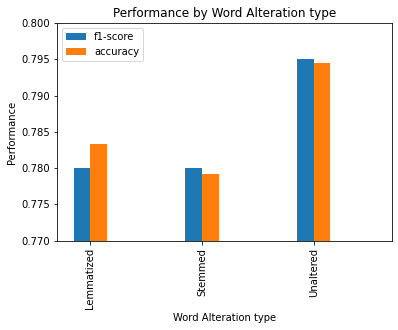

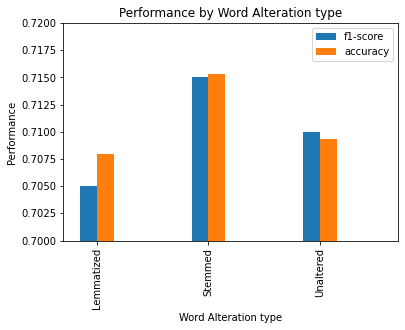

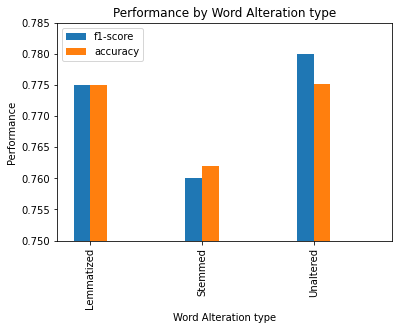

In [20]:

############### Lemma vs Stem vs Unaltered 480k ###################

# performed on 480k samples with non english words removed
width = .3
pltData = pd.DataFrame({ 
'accuracy': [.7833, .7792, .7945], 
'f1-score' : [.78, .78,.795]})

pltData[['f1-score', 'accuracy']].plot(kind = 'bar', width = width)

ax = plt.gca()

plt.xlim([-width, len(pltData['accuracy'])-width])

ax.set_ylim([.77, .8])
ax.set_xticklabels(('Lemmatized', 'Stemmed', 'Unaltered'))
ax.legend(labels = ['f1-score', 'accuracy'])
ax.set_title("Performance by Word Alteration type")
ax.set_ylabel('Performance')
ax.set_xlabel('Word Alteration type')


plt.show()

############### Lemma vs Stem vs Unaltered 10k ###################

width = .3
pltData = pd.DataFrame({ 
'accuracy': [.708, .7153, .7093], 
'f1-score' : [.705, .715,.71]})

pltData[['f1-score', 'accuracy']].plot(kind = 'bar', width = width)

ax = plt.gca()

plt.xlim([-width, len(pltData['accuracy'])-width])

ax.set_ylim([.7, .72])
ax.set_xticklabels(('Lemmatized', 'Stemmed', 'Unaltered'))
ax.legend(labels = ['f1-score', 'accuracy'])
ax.set_title("Performance by Word Alteration type")
ax.set_ylabel('Performance')
ax.set_xlabel('Word Alteration type')


plt.show()


############### Lemma vs Stem vs Unaltered 100k ###################

width = .3
pltData = pd.DataFrame({ 
'accuracy': [.7751, .762, .7752], 
'f1-score' : [.775, .76,.78]})

pltData[['f1-score', 'accuracy']].plot(kind = 'bar', width = width)

ax = plt.gca()

plt.xlim([-width, len(pltData['accuracy'])-width])

ax.set_ylim([.75, .785])
ax.set_xticklabels(('Lemmatized', 'Stemmed', 'Unaltered'))
ax.legend(labels = ['f1-score', 'accuracy'])
ax.set_title("Performance by Word Alteration type")
ax.set_ylabel('Performance')
ax.set_xlabel('Word Alteration type')


plt.show()

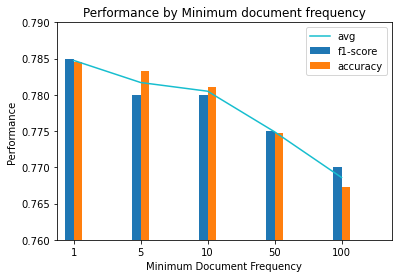

In [21]:
############### Alternative Plot for minumum document frequency ###################

width = .25 
pltData = pd.DataFrame({ 
'accuracy': [.7845, .7833, .7811, .7748, .7673], 
'f1-score' : [.785, .78, .78, .775, .77], 
'avg' : [.78475, .7817, .7805, .7749, .7686]})

pltData[['f1-score', 'accuracy']].plot(kind = 'bar', width = width)
pltData['avg'].plot(color = "tab:cyan")

ax = plt.gca()

plt.xlim([-width, len(pltData['accuracy'])-width])

ax.set_ylim([.76, .79])
ax.set_xticklabels(('1', '5', '10', '50', '100'))
ax.legend(labels = ['avg','f1-score', 'accuracy'])
ax.set_title("Performance by Minimum document frequency")
ax.set_ylabel('Performance')
ax.set_xlabel('Minimum Document Frequency')

plt.show()

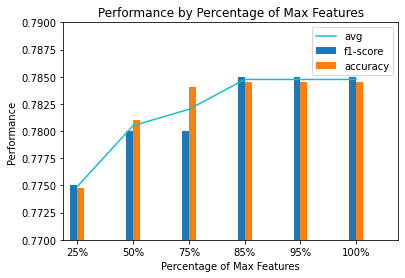

In [22]:
############### Plot for Max features ###################

width = .25 
pltData = pd.DataFrame({ 
'accuracy': [.7748, .7810, .7841, .7845, .7845, .7845], 
'f1-score' : [.775, .78, .78, .785, .785, .785], 
'avg' : [.7749, .7805, .7820, .78475, .78475, .78475]})

pltData[['f1-score', 'accuracy']].plot(kind = 'bar', width = width)
pltData['avg'].plot(color = "tab:cyan")

ax = plt.gca()

plt.xlim([-width, len(pltData['accuracy'])-width])

ax.set_ylim([.77, .79])
ax.set_xticklabels(('25%', '50%', '75%', '85%', '95%', '100%'))
ax.legend(labels = ['avg','f1-score', 'accuracy'])
ax.set_title("Performance by Percentage of Max Features")
ax.set_ylabel('Performance')
ax.set_xlabel('Percentage of Max Features')

plt.show()